In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 999

In [2]:
#import datasets
train = pd.read_csv('train.csv')

In [3]:
bs = pd.read_csv('Building_Structure.csv')
bo = pd.read_csv('Building_Ownership_Use.csv')

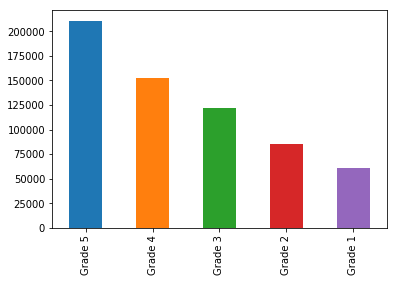

In [4]:
train.damage_grade.value_counts().plot('bar')

In [5]:
#merging all three files
train = pd.merge(train, bs, on='building_id')

In [6]:
train = pd.merge(train, bo, on='building_id')

In [7]:
train.head()

,area_assesed,building_id,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train.shape

(631761, 58)

In [9]:
train.dtypes

area_assesed                               object
building_id                                object
damage_grade                               object
district_id_x                               int64
has_geotechnical_risk                     float64
has_geotechnical_risk_fault_crack           int64
has_geotechnical_risk_flood                 int64
has_geotechnical_risk_land_settlement       int64
has_geotechnical_risk_landslide             int64
has_geotechnical_risk_liquefaction          int64
has_geotechnical_risk_other                 int64
has_geotechnical_risk_rock_fall             int64
has_repair_started                        float64
vdcmun_id_x                                 int64
district_id_y                               int64
vdcmun_id_y                                 int64
ward_id_x                                   int64
count_floors_pre_eq                         int64
count_floors_post_eq                        int64
age_building                                int64


From above we found that some of the values are not integers so we should change them. lets first store all these objects dtype in a list

In [10]:
object_type_columns = ['area_assesed', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'condition_post_eq', 'legal_ownership_status']

Lets see whether there are any missing values

In [11]:
columns_has_NaN = train.isna().sum()

In [12]:
columns_has_NaN = columns_has_NaN[columns_has_NaN.nonzero()[0]]

In [13]:
columns_has_NaN

has_repair_started    33417
count_families            1
dtype: int64

We can see now which columns have missing values

In [14]:
total_NaN = columns_has_NaN.sum()
print("Total number of missing values in the training data = " + str(total_NaN))

Total number of missing values in the training data = 33418


Lets fill these values with 0

In [15]:
train.fillna(0, inplace=True)

In [16]:
total_NaN = train.isna().sum().sum()
print("Total number of missing values in the training data = " + str(total_NaN))

Total number of missing values in the training data = 0


Now time to work for those object dtype values, lets change them to int values using labelencoder

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
number = LabelEncoder()
for col in object_type_columns:
    train[col] = number.fit_transform(train[col].astype('str'))

In [19]:
train.head()

,area_assesed,building_id,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
train.dtypes

area_assesed                                int64
building_id                                object
damage_grade                               object
district_id_x                               int64
has_geotechnical_risk                     float64
has_geotechnical_risk_fault_crack           int64
has_geotechnical_risk_flood                 int64
has_geotechnical_risk_land_settlement       int64
has_geotechnical_risk_landslide             int64
has_geotechnical_risk_liquefaction          int64
has_geotechnical_risk_other                 int64
has_geotechnical_risk_rock_fall             int64
has_repair_started                        float64
vdcmun_id_x                                 int64
district_id_y                               int64
vdcmun_id_y                                 int64
ward_id_x                                   int64
count_floors_pre_eq                         int64
count_floors_post_eq                        int64
age_building                                int64


So all values are now changed, apart from building id and damage grade that obviously shouldn't be changed.
We can now drop building_id as we won't need it.
Also now lets separate the target label from the input label 

In [21]:
y_train = pd.DataFrame(train.damage_grade)
y_train.head()

,damage_grade
0,Grade 4
1,Grade 2
2,Grade 1
3,Grade 5
4,Grade 3


In [22]:
X_train = train.drop(columns=['damage_grade', 'building_id'])
X_train.head()

,area_assesed,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,24,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,44,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,36,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,30,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,36,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X_train.shape

(631761, 56)

Lets remove the duplicates if any

In [24]:
duplicates = X_train.duplicated(keep=False)

In [25]:
X_train = X_train[~duplicates]

In [26]:
X_train.shape

(617725, 56)

In [27]:
y_train = y_train[~duplicates]

In [28]:
y_train.shape

(617725, 1)

In [29]:
y_train.head()

,damage_grade
0,Grade 4
1,Grade 2
2,Grade 1
3,Grade 5
4,Grade 3


In [30]:
total_number_of_features = len(X_train.columns)
print("Total number of features after pre processing = " + str(total_number_of_features))

Total number of features after pre processing = 56


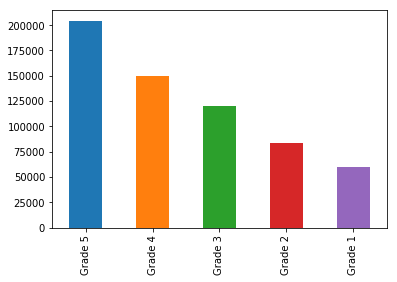

In [31]:
y_train.damage_grade.value_counts().plot('bar')

Lets do the same thing for our test data

In [32]:
test = pd.read_csv('test.csv')
test = pd.merge(test, bs, on='building_id')
test = pd.merge(test, bo, on='building_id')

columns_has_NaN = test.isna().sum()
columns_has_NaN = columns_has_NaN[columns_has_NaN.nonzero()[0]]
test.fillna(0, inplace=True)

for col in object_type_columns:
    test[col] = number.fit_transform(test[col].astype('str'))

In [33]:
test.head()

,area_assesed,building_id,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,a3380c4f75,7,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,a338a4e653,7,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,a338a4e6b7,7,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,a33a6eaa3a,7,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,a33b073ff6,7,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So finally lets train our model using RandomForestClassifier.

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
damage_grade = y_train['damage_grade']
damage_grade.shape

(617725,)

In [38]:
clf=RandomForestClassifier()
clf.fit(X_train,damage_grade)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
building_id = test['building_id']
test = test.drop(columns=['building_id'])
test.shape

(421175, 56)

Now lets predict damage grade for our test data

In [40]:
pred = clf.predict(test)

Lets save the final result to output.csv file with the damage grade and building id specified

In [41]:
final_result = pd.DataFrame({ 'building_id' : building_id , 'damage_grade' : pred})
final_result.to_csv('output.csv', index = False)

We can check the accuracy our predicted model by uploading this output file in hackerearth competition link as mentinoned: https://www.hackerearth.com/challenge/competitive/machine-learning-challenge-6-1/ Lets analyse the important features

In [43]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

height_ft_post_eq                         0.287668
condition_post_eq                         0.092776
age_building                              0.068064
plinth_area_sq_ft                         0.067382
count_floors_post_eq                      0.062534
ward_id_x                                 0.056557
ward_id_y                                 0.051419
vdcmun_id_x                               0.028259
height_ft_pre_eq                          0.027904
area_assesed                              0.025910
vdcmun_id_y                               0.025716
vdcmun_id                                 0.025106
other_floor_type                          0.016270
has_repair_started                        0.014493
roof_type                                 0.014005
foundation_type                           0.012956
position                                  0.010410
count_families                            0.010219
ground_floor_type                         0.008831
land_surface_condition         

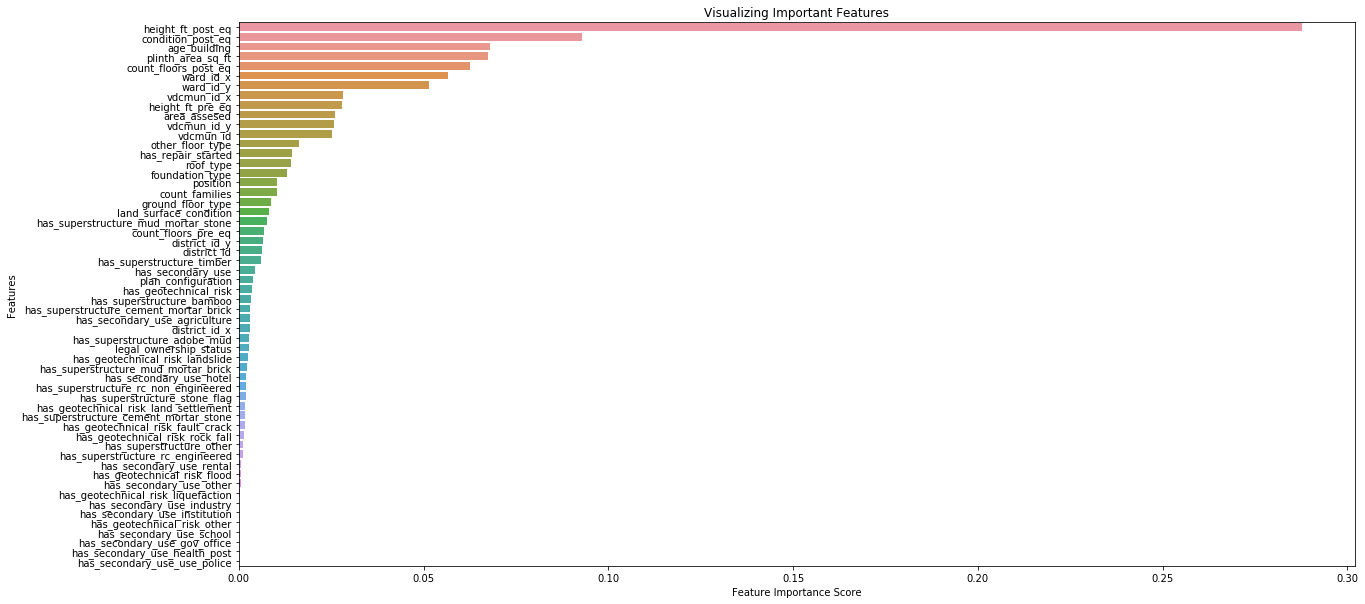

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=(20,10)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

So we can thus remove the features that are impacting our model to a very little extent from our train and test set.
This can further increase our model accuracy

In [45]:
train = X_train.drop(columns=['has_secondary_use_institution','has_geotechnical_risk_other','has_secondary_use_school','has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police'])
train.shape

(617725, 50)

In [47]:
test = test.drop(columns=['has_secondary_use_institution','has_geotechnical_risk_other','has_secondary_use_school','has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police'])
test.shape

(421175, 50)

Lets again train our model, in this new training set

In [48]:
clf=RandomForestClassifier()
clf.fit(train,damage_grade)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
pred = clf.predict(test)

Save the output in a csv file

In [50]:
final_result = pd.DataFrame({ 'building_id' : building_id , 'damage_grade' : pred})
final_result.to_csv('output.csv', index = False)

Check the accuracy again using the above mentioned HackerEarth link. We found that accuracy of our model has increased.
Lets save our trained model in joblib file which will be used later for application development purpose.

In [51]:
from sklearn.externals import joblib
joblib.dump(clf, 'clf.joblib') 

['clf.joblib']